In [1]:
#Buliding the Neural network model
import keras.layers
import tensorflow as tf
from tensorflow import keras

2023-05-08 17:54:16.017547: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
#the path to images
path_to_images = 'Data/dataset1/known_images'


In [25]:
# Training and validating the dataset
train_dataset, val_dataset = keras.utils.image_dataset_from_directory(
    path_to_images, 
    class_names = ['Normal','Sick'],
    batch_size = 16,
    image_size = (395, 488),
    validation_split = 0.2,
    subset = "both",
    seed = 200
)

Found 715 files belonging to 2 classes.
Using 572 files for training.
Using 143 files for validation.


In [28]:
#data augumentation
data_augmentation = keras.Sequential(

    [
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.2)
    ]
)

In [33]:
#Creating the input shape
inputs = keras.Input(shape = (395,488,3))

#data augumentation
X = data_augmentation(inputs)

#Normalising the features from (0-255) to (0-1)
X = keras.layers.Rescaling(1./255)(X)

#creating a convolutional layer with max pooling
X = keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(X)
X = keras.layers.MaxPooling2D(pool_size = 2)(X)

X = keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(inputs)
X = keras.layers.MaxPooling2D(pool_size = 2)(X)

X = keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(inputs)
X = keras.layers.MaxPooling2D(pool_size = 2)(X)

X = keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(inputs)
X = keras.layers.MaxPooling2D(pool_size = 2)(X)

X = keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(inputs)
X = keras.layers.MaxPooling2D(pool_size = 2)(X)

X = keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(inputs)
X = keras.layers.MaxPooling2D(pool_size = 2)(X)

X = keras.layers.Flatten()(X)

#X = keras.layers.Dense(64, activation = 'relu')(X)

# Dropout
X = keras.layers.Dropout(0.5)(X)


#Creating the model output
outputs = keras.layers.Dense(1, activation = 'sigmoid')(X)



In [35]:
model = keras.Model(
    inputs = inputs,
    outputs = outputs,
    name = 'Chest_Opacities_Detection'
)

In [36]:
model.summary()

Model: "Chest_Opacities_Detection"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 395, 488, 3)]     0         
                                                                 
 conv2d_29 (Conv2D)          (None, 393, 486, 256)     7168      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 196, 243, 256)    0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 12192768)          0         
                                                                 
 dropout_3 (Dropout)         (None, 12192768)          0         
                                                                 
 dense_3 (Dense)             (None, 1)                 12192769  
                                         

In [37]:
#Compiling the model

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

In [39]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'models/chest_opacities_detection_model.keras',
        save_best_only = True,
        monitor = 'val_loss'
        
   )
]

In [40]:

history = model.fit(

    train_dataset,
    epochs = 30,
    validation_data = val_dataset,
    callbacks = callbacks
    
)

Epoch 1/30
36/36 [==============================] - 437s 12s/step - loss: 1611.1964 - accuracy: 0.7762 - val_loss: 7.9711 - val_accuracy: 0.9231
Epoch 2/30
36/36 [==============================] - 483s 13s/step - loss: 21.7523 - accuracy: 0.8969 - val_loss: 881.5093 - val_accuracy: 0.6154
Epoch 3/30
36/36 [==============================] - 483s 13s/step - loss: 156.4449 - accuracy: 0.8497 - val_loss: 1055.8510 - val_accuracy: 0.4336
Epoch 4/30
36/36 [==============================] - 512s 14s/step - loss: 190.0617 - accuracy: 0.8357 - val_loss: 27.2639 - val_accuracy: 0.9301
Epoch 5/30
36/36 [==============================] - 580s 16s/step - loss: 345.7592 - accuracy: 0.8409 - val_loss: 10.3356 - val_accuracy: 0.9580
Epoch 6/30
36/36 [==============================] - 585s 16s/step - loss: 103.8181 - accuracy: 0.9108 - val_loss: 18.3871 - val_accuracy: 0.9720
Epoch 7/30
36/36 [==============================] - 536s 15s/step - loss: 10.7323 - accuracy: 0.9598 - val_loss: 254.8175 - val_

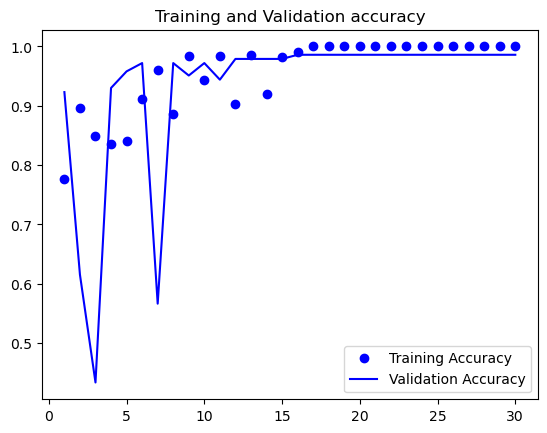

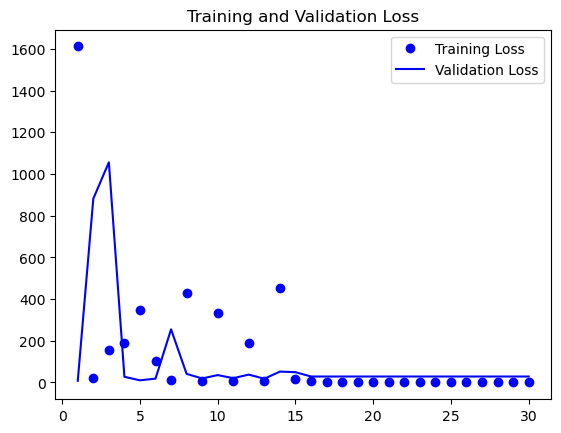

<Figure size 640x480 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt
accuracy = history.history ['accuracy']
val_accuracy = history.history ['val_accuracy']
loss = history.history ['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss,'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()
plt.show()
